# Homework1
### B08705038 資管四 郭子麟

## Question1 - myknn_regressor

### Q1.1 Create your myknn_regressor based on the skeleton

In [3]:
# loading basic packages
import pickle
from sklearn import preprocessing
import numpy as np

In [9]:
# implement my_knn class
class my_knn_regressor:
  def __init__(self, n_neighbors = 10, mean_type = "equal_weight"):
    """
    mean_type can be equal_weight or remove_outliers.
    equal_weight use the same weight for all neighbors.
    remove_outliers remove neighbors out in [Q1 - 1.5 IQR, Q3 + 1.5IQR].
    """
    self.n_neighbors = n_neighbors
    self.mean_type = mean_type
    # if n_neighbors is less than 10, use equal_weight anyway
    if n_neighbors < 10:
      self.mean_type = "equal_weight"
    
  def fit(self, x_train, y_train):
    """
    x_train: numpy array of shape (n_samples, n_features)
    y_train: numpy array of shape (n_samples, )
    """
    self.x_train = x_train
    self.y_train = y_train
  def predict(self, x_test):
    """
    x_test: numpy array of shape (n_samples, n_features)
    return: numpy array of shape (n_samples, )
    """
    # get the number of samples
    n_samples = x_test.shape[0]
    # initialize the prediction array
    y_pred = np.zeros(n_samples)
    # for each sample in x_test
    for i in range(n_samples):
      # get the distance between x_test[i] and all samples in x_train
      # 因為每個 sample 都會跟全部的 x_train 計算距離，所以這邊用 broadcasting
      dist = np.sqrt(np.sum((x_test[i] - self.x_train)**2, axis = 1))
      # get the index of the n_neighbors smallest distance
      idx = np.argsort(dist)[:self.n_neighbors]
      # get the corresponding y_train
      y = self.y_train[idx]
      # if mean_type is equal_weight
      if self.mean_type == "equal_weight":
        # get the mean of y
        y_pred[i] = np.mean(y)
      # if mean_type is remove_outlier
      else:
        # get the Q1 and Q3
        Q1 = np.percentile(y, 25)
        Q3 = np.percentile(y, 75)
        # get the IQR
        IQR = Q3 - Q1
        # get the index of y in [Q1 - 1.5 IQR, Q3 + 1.5IQR]
        idx = np.where((y >= Q1 - 1.5 * IQR) & (y <= Q3 + 1.5 * IQR))
        # get the corresponding y_train
        y = y[idx]
        # get the mean of y
        y_pred[i] = np.mean(y)
    return y_pred

### Q1.2 Load data, fit, predict and list the RMSE and the first 20 predictions in the test data

#### Load data

In [10]:
# Load data
with open('msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

doscaling = 1

if (doscaling == 1):
    xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
    #standardize feature values
    X_train = xscaler.transform(msd_data['X_train'])
    X_test = xscaler.transform(msd_data['X_test'])
else:
    X_train = msd_data['X_train']
    X_test = msd_data['X_test']

Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']

#### Initialize my_knn_regressor, fit the model and predict the outcome

In [11]:
my_knn = my_knn_regressor(n_neighbors = 20, mean_type = "equal_weight")
my_knn.fit(X_train, Y_train)
Y_pred = my_knn.predict(X_test)
Y_pred

array([1993.35, 1993.8 , 2000.65, ..., 1998.95, 2002.6 , 1994.25])

#### List the RMSE and first 20 predictions in the testing data

In [12]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print(f"RMSE is {rmse}")
print(f"The first 20 predictions are {Y_pred[:20]}")

RMSE is 10.25126451549596
The first 20 predictions are [1993.35 1993.8  2000.65 1991.5  1992.8  1998.5  1988.1  1991.65 2002.25
 2003.   2000.5  1998.65 1995.55 1997.2  1995.05 1997.4  1992.15 2000.45
 2003.2  1995.75]


### Q1.3 Use remove_outlier to get the prediction and calculate the RMSE and list the first 20 predictions.

#### Initialize my_knn_regressor, fit the model and predict the outcome

In [13]:
my_knn = my_knn_regressor(n_neighbors = 20, mean_type = "remove_outlier")
my_knn.fit(X_train, Y_train)
Y_pred_with_remove_outlier = my_knn.predict(X_test)
Y_pred_with_remove_outlier

array([1993.35      , 1993.8       , 2000.65      , ..., 2002.94117647,
       2002.6       , 1994.25      ])

#### List the RMSE and first 20 predictions in the testing data

In [14]:
rmse = sqrt(mean_squared_error(Y_test, Y_pred_with_remove_outlier))
print(f"RMSE with remove outlier method is {rmse}")
print(f"The first 20 predictions are {Y_pred_with_remove_outlier[:20]}")

RMSE with remove outlier method is 10.212572466080376
The first 20 predictions are [1993.35       1993.8        2000.65       1992.73684211 1992.8
 2000.         1988.1        1991.65       2002.25       2003.94736842
 2000.5        2000.94444444 1995.55       1997.2        1998.61111111
 1997.4        1992.15       2003.83333333 2003.2        1995.75      ]


## Question2 - Tuning the Hyper-Parameter

In [21]:
from sklearn.neighbors import KNeighborsRegressor

# define candidate neighbors list
candidate_k_list = [1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200]

# rmse list for three settings
first_rmse_list = []
second_rmse_list = []
third_rmse_list = []

# setup data with / without feature scaling
# Load data
with open('msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
# standardize feature values
X_train_feature_scaling = xscaler.transform(msd_data['X_train'])
X_test_feature_scaling = xscaler.transform(msd_data['X_test'])


X_train = msd_data['X_train']
X_test = msd_data['X_test']

Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']


# for each candidate k, train the model and get the rmse
for k in candidate_k_list:
  # setting 1: use KNeighbors with feature scaling data
  knn_1 = KNeighborsRegressor(n_neighbors = k)
  knn_1.fit(X_train_feature_scaling, Y_train)
  Y_pred_1 = knn_1.predict(X_test_feature_scaling)
  first_rmse_list.append(sqrt(mean_squared_error(Y_test, Y_pred_1)))

  # setting 2: use KNeighbors with original data
  knn_2 = KNeighborsRegressor(n_neighbors = k)
  knn_2.fit(X_train, Y_train)
  Y_pred_2 = knn_2.predict(X_test)
  second_rmse_list.append(sqrt(mean_squared_error(Y_test, Y_pred_2)))

  # setting 3: use my_knn_regressor with feature scaling data
  knn_3 = my_knn_regressor(n_neighbors = k, mean_type = "remove_outlier")
  knn_3.fit(X_train_feature_scaling, Y_train)
  Y_pred_3 = knn_3.predict(X_test_feature_scaling)
  third_rmse_list.append(sqrt(mean_squared_error(Y_test, Y_pred_3)))

#### For each setting, plot a curve that shows the relations between k (x-axis) and RMSE (y-axis)

Text(0, 0.5, 'RMSE')

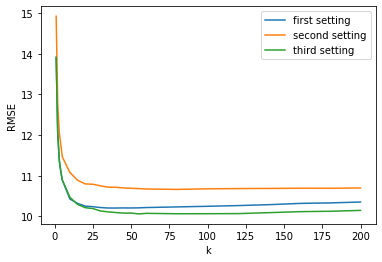

In [25]:
import matplotlib.pyplot as plt

plt.plot(candidate_k_list, first_rmse_list, label = "first setting")
plt.plot(candidate_k_list, second_rmse_list, label = "second setting")
plt.plot(candidate_k_list, third_rmse_list, label = "third setting")
plt.legend()
plt.xlabel("k")
plt.ylabel("RMSE")


#### Observations
Cool! Copilot is awesome...

In [ ]:
# Load data
with open('msd_data1.pickle', 'rb') as fh1:
    msd_data = pickle.load(fh1)

doscaling = 1

if (doscaling == 1):
    xscaler = preprocessing.StandardScaler().fit(msd_data['X_train'])
    #standardize feature values
    X_train = xscaler.transform(msd_data['X_train'])
    X_test = xscaler.transform(msd_data['X_test'])
else:
    X_train = msd_data['X_train']
    X_test = msd_data['X_test']

Y_train = msd_data['Y_train']
Y_test = msd_data['Y_test']